# **Implement the Word2vec model and train your own word vectors using CBOW model.**

## IMPORTING LIBRARIES


In [ ]:
import gzip
import shutil

from google.colab import drive
drive.mount('/content/drive')

import json
import ast

import re
import nltk
nltk.download('punkt')

import math
import numpy as np

from keras.preprocessing.text import Tokenizer
from scipy import spatial
from heapq import nlargest
import gensim.downloader
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gensim.downloader

Mounted at /content/drive
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## GET DATA

In [ ]:
def get_data():    
  with gzip.open('drive/MyDrive/reviews_Electronics_5.json.gz', 'rb') as f_in:
      with open('Electronics_5.json', 'wb') as f_out:
          shutil.copyfileobj(f_in, f_out)
  raw_text=[]

  f = open('Electronics_5.json',)

  for line in f:
    res = ast.literal_eval(line)
    raw_text.append(res["reviewText"].lower())

  f.close()
  return raw_text

In [ ]:
raw_text = get_data()

In [ ]:
print(raw_text[0])
print(len(raw_text))


we got this gps for my husband who is an (otr) over the road trucker.  very impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  worked great when it worked!  will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  love the bigger screen, the ease of use, the ease of putting addresses into memory.  nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck.  i contacted the seller and within minutes of my email i received a email back with instructions for an exchange! very impressed all the way around!
1689188


In [ ]:
import os
os.remove("Electronics_5.json")

## PRE-PROCESSING DATA

reviews to good data  - in sentence_file.txt
1. just sentences with words..no punctuations
2. returns count of total words present
3. returns dictionary

In [ ]:
def raw_text_to_sentences(raw_text):
  d={}
  word_count=1
  f= open("sentence_file.txt","x")
  f.close()
  f = open("sentence_file.txt","w" )
  for para in raw_text:
    nltk_tokens = nltk.sent_tokenize(para)
    for words in nltk_tokens:
      sent = re.findall("[A-Za-z]+", words)
      line = ""
      for word in sent:
        line = line + ' ' + word.lower()
        word_count+=1
        try:
            d[word.lower()] += 1
        except KeyError:
            d[word.lower()] = 1
      f.write(line)
      f.write("\n")
  f.close()
  return d,word_count

In [ ]:
def remove_infrequent_words(d,n,xx):
  less_freq_word=0
  f = open("sentence_file.txt", "r")
  lines = f.readlines()
  no_of_lines = len(lines)

  for i in range(no_of_lines):
    x=""
    words=lines[i].split()
    for word in words:
      try:
        if d[word]>n and d[word]<xx:
          x= x + ' ' + word
        else :
          less_freq_word+=1
      except Keyerror:
        pass
    lines[i] = x + "\n"

  f = open("sentence_file.txt", "w")
  f.writelines(lines)
  f.close()
  return less_freq_word


removed words with frequency less than 5 - updates in sentence_file.txt
1. returns no of words removed

In [ ]:

def sub_sampling(count_dictionary):
  removed_words = 0
  f = open("sentence_file.txt", "r")
  lines = f.readlines()
  no_of_lines = len(lines)
  total_words = len(count_dictionary)
  for i in range(no_of_lines):
    x=""
    words=lines[i].split()
    for word in words:
      frac = (count_dictionary[word]/ total_words)/0.001
      prob = (math.sqrt(frac) + 1) * (0.001/frac)
      if np.random.random() < prob:
          x= x + ' ' + word
      else :
        removed_words += 1
    lines[i] = x + "\n"

  f = open("sentence_file.txt", "w")
  f.writelines(lines)
  f.close()
  return removed_words

In [ ]:
count_dictionary, word_count = raw_text_to_sentences(raw_text)

In [ ]:
del raw_text

In [ ]:
from operator import itemgetter
import operator
d= dict(sorted(count_dictionary.items(), key = itemgetter(1), reverse = True)[:50])
xx = min(d.values())

In [ ]:
less_freq_word = remove_infrequent_words(count_dictionary,5,xx)

In [ ]:
print(word_count)

200736572


In [ ]:
removed_words_from_subsampling = sub_sampling(count_dictionary)

In [ ]:
removed_words_from_subsampling

110319171

In [ ]:
word_count - removed_words_from_subsampling

90417401

In [ ]:
file = open("sentence_file.txt","r")
Counter = 0
Content = file.read()
CoList = Content.split("\n")
  
for i in CoList:
    if i:
        Counter += 1
          
print("This is the number of lines in the file")
print(Counter)
file.close()

This is the number of lines in the file
10298912


## CREATING VOCAB

In [ ]:
f = open("sentence_file.txt", "r")
lines = f.readlines()
f.close()


tokenizer=Tokenizer()

tokenizer.fit_on_texts(lines) #updating internal vocabulary based on a list of texts.

word_to_index = tokenizer.word_index # assigning indexes to words
vocab_length = len(word_to_index)

index_to_words = {}    # assigning words to indexes
for k,v in word_to_index.items():
  index_to_words[v] = k


In [ ]:
print(lines[0][:-1])
print(vocab_length)

 we got gps husband who otr over road trucker
70686


In [ ]:
#print(word_to_index)

#print(index_to_words)

{'a': 1, 'the': 2, 'it': 3, 'of': 4, 'we': 5, 'got': 6, 'this': 7, 'gps': 8, 'for': 9, 'my': 10, 'husband': 11, 'who': 12, 'is': 13, 'an': 14, 'otr': 15, 'over': 16, 'road': 17, 'trucker': 18, 'very': 19, 'impressed': 20, 'with': 21, 'shipping': 22, 'time': 23, 'arrived': 24, 'few': 25, 'days': 26, 'earlier': 27, 'than': 28, 'expected': 29, 'within': 30, 'week': 31, 'use': 32, 'however': 33, 'started': 34, 'freezing': 35, 'up': 36, 'could': 37, 'just': 38, 'been': 39, 'glitch': 40, 'in': 41, 'that': 42, 'unit': 43}
43
{1: 'a', 2: 'the', 3: 'it', 4: 'of', 5: 'we', 6: 'got', 7: 'this', 8: 'gps', 9: 'for', 10: 'my', 11: 'husband', 12: 'who', 13: 'is', 14: 'an', 15: 'otr', 16: 'over', 17: 'road', 18: 'trucker', 19: 'very', 20: 'impressed', 21: 'with', 22: 'shipping', 23: 'time', 24: 'arrived', 25: 'few', 26: 'days', 27: 'earlier', 28: 'than', 29: 'expected', 30: 'within', 31: 'week', 32: 'use', 33: 'however', 34: 'started', 35: 'freezing', 36: 'up', 37: 'could', 38: 'just', 39: 'been', 40:

## CBOW MODEL

In [ ]:
from keras.preprocessing import sequence
def create_context_words(data,i):
  
  i=int(i)
  line = data [i]
  line = line[:-1]
  words=line.split()
  no_of_words = len(words)
  index=0
  target_words=[]
  context_words=[]
  if (no_of_words ==0):
    return [],[]
  for word in words:
    target_word= [0]*vocab_length
    target_word[word_to_index[word]]=1
    target_words.append(target_word)
    context_word=[]
    start = index - 1
    end = index + 1
    for i in range(start,end+1):
      if 0<=i<index or index<i<no_of_words:
        context_word.append(word_to_index[words[i]])
    context_words.append(context_word)
    
    index=index+1
  context_words = sequence.pad_sequences(context_words, maxlen=2)
  return context_words,target_words

## MODEL

In [ ]:
len(lines)

10362640

In [ ]:
from keras.layers import Dense, Embedding, Lambda
import keras.backend as K
from keras.models import Sequential

embedding_size=100

model = Sequential()

model.add ( Embedding(input_dim=vocab_length , output_dim=embedding_size ,input_length=2))
model.add ( Lambda(lambda x:K.mean(x, axis=1) , output_shape=(embedding_size,)))
model.add ( Dense(vocab_length, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam')


In [ ]:
for i in range(1):
    for j in range(0,100000):
      x,y = create_context_words(lines,j)
      print(i,j)
      if x!=[] and y!=[]:
        model.train_on_batch(np.array(x),np.array(y))

## SAVING MODEL

In [ ]:
model.save("drive/MyDrive/nlpq2(1).h5")

In [ ]:
weight_matrix = model.get_weights()[0]
weight_matrix = weight_matrix[1:] #remove padding

In [ ]:
import pickle
loc = '/content/drive/MyDrive/weight_matrix_q2(1).pkl'
with open(loc, 'wb') as fl:
 pickle.dump(weight_matrix, fl)

In [ ]:
print(weight_matrix.shape)

(70685, 100)


In [ ]:
#csine dist for 60th row with other rows..jo top min/max distance - choose that
def cosine_similarity(v1,v2):
  result = 1 - spatial.distance.cosine(v1, v2)
  return result

Display the top-10 word vectors for 5 different words (a combination of nouns,
verbs, adjectives etc) using the above pre-trained models (1,2) using t-SNE (or
such methods).

In [ ]:
words = ["husband","shipping","truck","road","beautiful"]

Top 10 closest words for : husband
depress
okay
trendnet
news
placing
booting
prices
hollow
soundtracks
hunting
---------------------------------------



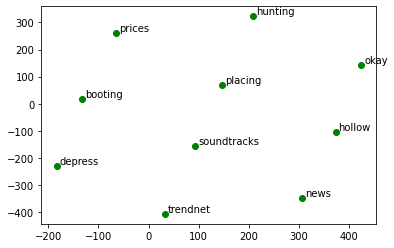

In [ ]:
word = "husband"
dist_matrix={}
x=word_to_index[word]
#print(x)
dist_matrix[x]=0

embedings=[]
top_words=[]
for i in range(1,70685):  
  if i!=x:
    dist_matrix[i] = cosine_similarity(weight_matrix[i],weight_matrix[x])

TenHighest = nlargest(10, dist_matrix, key = dist_matrix.get)
print("Top 10 closest words for : ", end = word)
print()
for val in TenHighest:
  print(index_to_words[val])
  embedings.append(weight_matrix[val])
  top_words.append(val)
print("---------------------------------------")
print()
tsne=TSNE()
tsne_list =tsne.fit_transform(embedings)
#plotting tsne graph

x_coord , y_coord = [] , []

tsne_list_size = len(tsne_list) 
for i in range(0,tsne_list_size):
  x_coord.append(tsne_list[i][0])
  y_coord.append(tsne_list[i][1])
plt.scatter(x_coord, y_coord, c ="green")

for i in range(0,tsne_list_size):
  plt.annotate(index_to_words[top_words[i]], (x_coord[i]+6,y_coord[i]+6))

Top 10 closest words for : shipping
highest
device
able
dvi
glasses
sliding
then
collapsible
vinyl
sofa
---------------------------------------



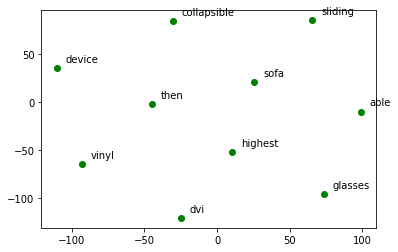

In [ ]:
word = "shipping"
dist_matrix={}
x=word_to_index[word]
#print(x)
dist_matrix[x]=0

embedings=[]
top_words=[]
for i in range(1,70685):  
  if i!=x:
    dist_matrix[i] = cosine_similarity(weight_matrix[i],weight_matrix[x])

TenHighest = nlargest(10, dist_matrix, key = dist_matrix.get)
print("Top 10 closest words for : ", end = word)
print()
for val in TenHighest:
  print(index_to_words[val])
  embedings.append(weight_matrix[val])
  top_words.append(val)
print("---------------------------------------")
print()
tsne=TSNE()
tsne_list =tsne.fit_transform(embedings)
#plotting tsne graph

x_coord , y_coord = [] , []

tsne_list_size = len(tsne_list) 
for i in range(0,tsne_list_size):
  x_coord.append(tsne_list[i][0])
  y_coord.append(tsne_list[i][1])
plt.scatter(x_coord, y_coord, c ="green")

for i in range(0,tsne_list_size):
  plt.annotate(index_to_words[top_words[i]], (x_coord[i]+6,y_coord[i]+6))

Top 10 closest words for : truck
repurchase
grown
tearing
yup
coolers
deformed
blueray
angles
safekeeping
transcend
---------------------------------------



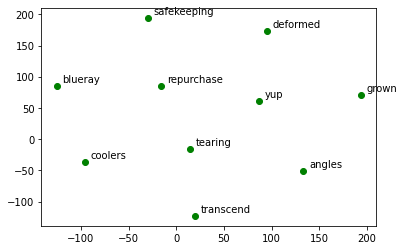

In [ ]:
word = "truck"
dist_matrix={}
x=word_to_index[word]
#print(x)
dist_matrix[x]=0

embedings=[]
top_words=[]
for i in range(1,70685):  
  if i!=x:
    dist_matrix[i] = cosine_similarity(weight_matrix[i],weight_matrix[x])

TenHighest = nlargest(10, dist_matrix, key = dist_matrix.get)
print("Top 10 closest words for : ", end = word)
print()
for val in TenHighest:
  print(index_to_words[val])
  embedings.append(weight_matrix[val])
  top_words.append(val)
print("---------------------------------------")
print()
tsne=TSNE()
tsne_list =tsne.fit_transform(embedings)
#plotting tsne graph

x_coord , y_coord = [] , []

tsne_list_size = len(tsne_list) 
for i in range(0,tsne_list_size):
  x_coord.append(tsne_list[i][0])
  y_coord.append(tsne_list[i][1])
plt.scatter(x_coord, y_coord, c ="green")

for i in range(0,tsne_list_size):
  plt.annotate(index_to_words[top_words[i]], (x_coord[i]+6,y_coord[i]+6))

Top 10 closest words for : road
multiple
sensitivity
theater
make
supportive
lost
superb
lane
bluetooth
stabilization
---------------------------------------



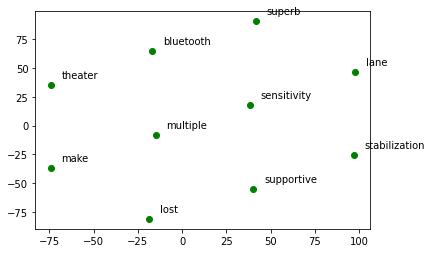

In [ ]:
word = "road"
dist_matrix={}
x=word_to_index[word]
#print(x)
dist_matrix[x]=0

embedings=[]
top_words=[]
for i in range(1,70685):  
  if i!=x:
    dist_matrix[i] = cosine_similarity(weight_matrix[i],weight_matrix[x])

TenHighest = nlargest(10, dist_matrix, key = dist_matrix.get)
print("Top 10 closest words for : ", end = word)
print()
for val in TenHighest:
  print(index_to_words[val])
  embedings.append(weight_matrix[val])
  top_words.append(val)
print("---------------------------------------")
print()
tsne=TSNE()
tsne_list =tsne.fit_transform(embedings)
#plotting tsne graph

x_coord , y_coord = [] , []

tsne_list_size = len(tsne_list) 
for i in range(0,tsne_list_size):
  x_coord.append(tsne_list[i][0])
  y_coord.append(tsne_list[i][1])
plt.scatter(x_coord, y_coord, c ="green")

for i in range(0,tsne_list_size):
  plt.annotate(index_to_words[top_words[i]], (x_coord[i]+6,y_coord[i]+6))

Top 10 closest words for : beautiful
pixs
lifts
warnings
grown
exploring
rails
investments
converters
repurchase
transcend
---------------------------------------



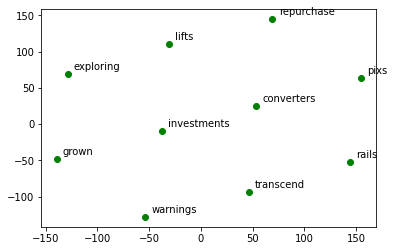

In [ ]:
word = "beautiful"
dist_matrix={}
x=word_to_index[word]
#print(x)
dist_matrix[x]=0

embedings=[]
top_words=[]
for i in range(1,70685):  
  if i!=x:
    dist_matrix[i] = cosine_similarity(weight_matrix[i],weight_matrix[x])

TenHighest = nlargest(10, dist_matrix, key = dist_matrix.get)
print("Top 10 closest words for : ", end = word)
print()
for val in TenHighest:
  print(index_to_words[val])
  embedings.append(weight_matrix[val])
  top_words.append(val)
print("---------------------------------------")
print()
tsne=TSNE()
tsne_list =tsne.fit_transform(embedings)
#plotting tsne graph

x_coord , y_coord = [] , []

tsne_list_size = len(tsne_list) 
for i in range(0,tsne_list_size):
  x_coord.append(tsne_list[i][0])
  y_coord.append(tsne_list[i][1])
plt.scatter(x_coord, y_coord, c ="green")

for i in range(0,tsne_list_size):
  plt.annotate(index_to_words[top_words[i]], (x_coord[i]+6,y_coord[i]+6))

What are the top 10 closest words for the word ‘camera’ in the embeddings gen-
erated by your program. Compare them against the pre-trained word2vec embed-
dings that you can download off the shelf (can use gensim).

In [ ]:
dist_matrix={}
x=word_to_index['camera']
#print(x)
dist_matrix[x]=0

for i in range(1,70685):  
  if i!=x:
    dist_matrix[i] = cosine_similarity(weight_matrix[i],weight_matrix[x])

from heapq import nlargest
TenHighest = nlargest(10, dist_matrix, key = dist_matrix.get)
print("Top 10 closest words for 'camera' :")
print()
for val in TenHighest:
    #print(val)
    print(index_to_words[val])

Top 10 closest words for 'camera' :

makes
sharp
absolutely
cons
system
hardware
duration
separate
single
priced


## GENSIM WORD2VEC COMPARISON

In [ ]:
word2vec_vectors = gensim.downloader.load('word2vec-google-news-300')
word2vec_vectors.most_similar('camera')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
word2vec_vectors.most_similar('camera')

[('cameras', 0.8131939172744751),
 ('Wagging_finger', 0.7311819791793823),
 ('camera_lens', 0.7250816822052002),
 ('camcorder', 0.7037474513053894),
 ('Camera', 0.6848659515380859),
 ('Canon_digital_SLR', 0.6474252939224243),
 ('Cameras', 0.6350969076156616),
 ('Nikon_D####_digital_SLR', 0.6259366273880005),
 ('tripod', 0.6189837455749512),
 ('EyeToy_USB', 0.6173486709594727)]

comparison btw the two :

comparison btw the two : the words are not the same, but the words predicted by word emebedding model using svd still returns words similar to the target word "camera"